In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nxpd import draw
from palettable.cmocean.diverging import Curl_20
%matplotlib inline

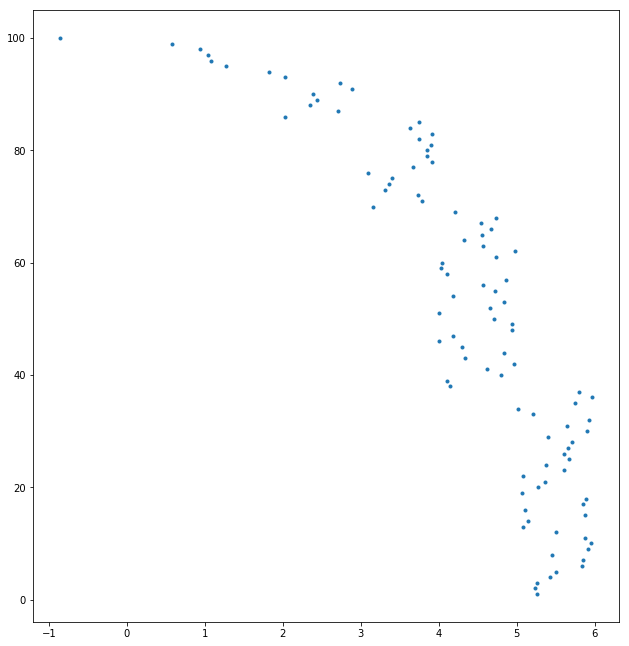

In [82]:
n_nodes = 100
nodes = pd.DataFrame(np.array([np.arange(1, n_nodes+1)]).T, columns=['y'])
nodes['depth'] = np.floor(np.log2(n_nodes-np.arange(1, n_nodes+1)+1))
nodes['x'] = nodes.depth-np.random.rand(n_nodes)
cmap = Curl_20.mpl_colormap
plt.figure(figsize=(21/2,22.5/2))
plt.plot(nodes.x, nodes.y, '.')

In [93]:
depths = sorted(list(set(nodes.depth)))
nodes.depth[nodes.depth==5]

37    5.0
38    5.0
39    5.0
40    5.0
41    5.0
42    5.0
43    5.0
44    5.0
45    5.0
46    5.0
47    5.0
48    5.0
49    5.0
50    5.0
51    5.0
52    5.0
53    5.0
54    5.0
55    5.0
56    5.0
57    5.0
58    5.0
59    5.0
60    5.0
61    5.0
62    5.0
63    5.0
64    5.0
65    5.0
66    5.0
67    5.0
68    5.0
Name: depth, dtype: float64

In [139]:
y = np.array([0, 1, -1])
for dep in depths[::-1]:
    if dep <=1:
        pass
    else:
        spacing = np.linspace(1,dep-1,(2**(dep))/2)
        print(len(spacing))
        y = np.hstack((y, spacing))
        y = np.hstack((y, -spacing))

32
16
8
4
2


In [149]:
nodes['new_y']=y[:n_nodes][::-1]+np.random.rand(n_nodes)

In [216]:
def add_node(node_df, depth, noise=0.1):
    x = depth
    y = depth*np.random.uniform(-1,1)
    node = pd.Series([depth, x, y], index=['depth','x', 'y'])
    node_df = node_df.append(node, ignore_index=True)
    return node_df

def add_edge(edge_df, node1, node2, value):
#     edge = np.array([[node1.x, node1.y]])
    pass
    

In [228]:
nodes = pd.DataFrame()

for depth in range(0, 5):
    n_nodes = 3**depth
    for n in range(n_nodes):
        if depth == 0:
            noise = 0
        else:
            noise = 1
        nodes = add_node(nodes, depth, noise)
    if depth > 0:
        edges = np.random.randint(-1, 2, (n_nodes, int(n_nodes/3)))
        edges = edges*edges*edges
        print(edges)

        

[[ 0]
 [-1]
 [-1]]
[[ 1 -1  1]
 [ 0 -1  0]
 [-1  0  1]
 [ 1  1  0]
 [-1  1  0]
 [ 0 -1  1]
 [ 0  0  1]
 [ 0  1 -1]
 [ 1  1  0]]
[[-1  0  1 -1  0  1  0  1  0]
 [-1 -1 -1 -1  1 -1 -1  1  0]
 [ 1  0 -1 -1 -1  1  0  1  0]
 [-1  0 -1  0  0  1  0  1 -1]
 [ 0  0  1  0  0  0  0 -1  0]
 [ 1 -1 -1 -1  1 -1 -1 -1  1]
 [ 0  1  1  0  1 -1  0 -1 -1]
 [-1  1  0  0 -1  0 -1  1  1]
 [ 0  0  1  0  1  1  0 -1 -1]
 [-1  0  0  1  0  1  0 -1  1]
 [ 0 -1 -1  0  0  1  0 -1  1]
 [-1  0  1 -1  1  1  0 -1  0]
 [ 1  1  1 -1  1  1  1 -1 -1]
 [ 1 -1  1  0  1 -1 -1 -1  0]
 [-1 -1  0  0  0 -1  0 -1  1]
 [ 1 -1  0  1  1 -1 -1  1  1]
 [ 0  1 -1  0 -1  0 -1  0  0]
 [-1 -1  0 -1  1  0  0 -1  0]
 [ 1  0  0  0 -1  0 -1 -1  0]
 [ 0  0  1  0 -1  1  0  0  0]
 [ 0  0  0 -1  1 -1  1  0  0]
 [ 0 -1  0  1  1  1  0  1  0]
 [ 0  1 -1  0  0  0  0  1  1]
 [ 0 -1  1  1  1 -1 -1  0  0]
 [-1  0 -1  0 -1 -1  0  0  1]
 [-1  0  0  0 -1  1 -1  1  1]
 [ 0  1 -1  0  0  0  1  1  0]]
[[ 0 -1  0 ..., -1  1  1]
 [ 0 -1 -1 ...,  1  1  0]
 [-1  0 -

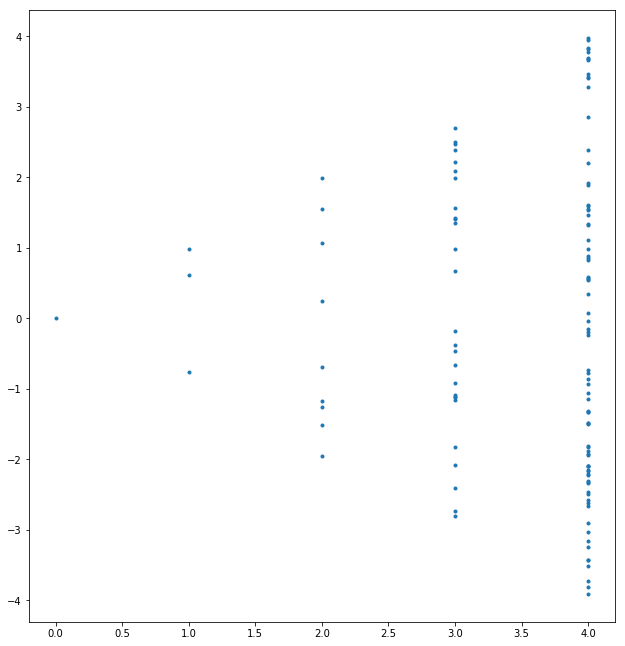

In [207]:
plt.figure(figsize=(21/2,22.5/2))
plt.plot(nodes.x, nodes.y, '.')

In [231]:
from palettable.cartocolors.qualitative import Bold_7

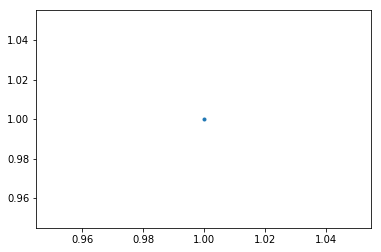